Lab 2

Claire Dubin

9/7/18

In [117]:
import Bio
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord 
from Bio.Seq import Seq
from Bio import Phylo
from io import StringIO


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Tree visualization:

There are clusters at the end of most branches, the largest being at branch length 0 and 0.13. The sequences in clusters are most closely related, and rh52 seems to be the least related to the other sequences. 

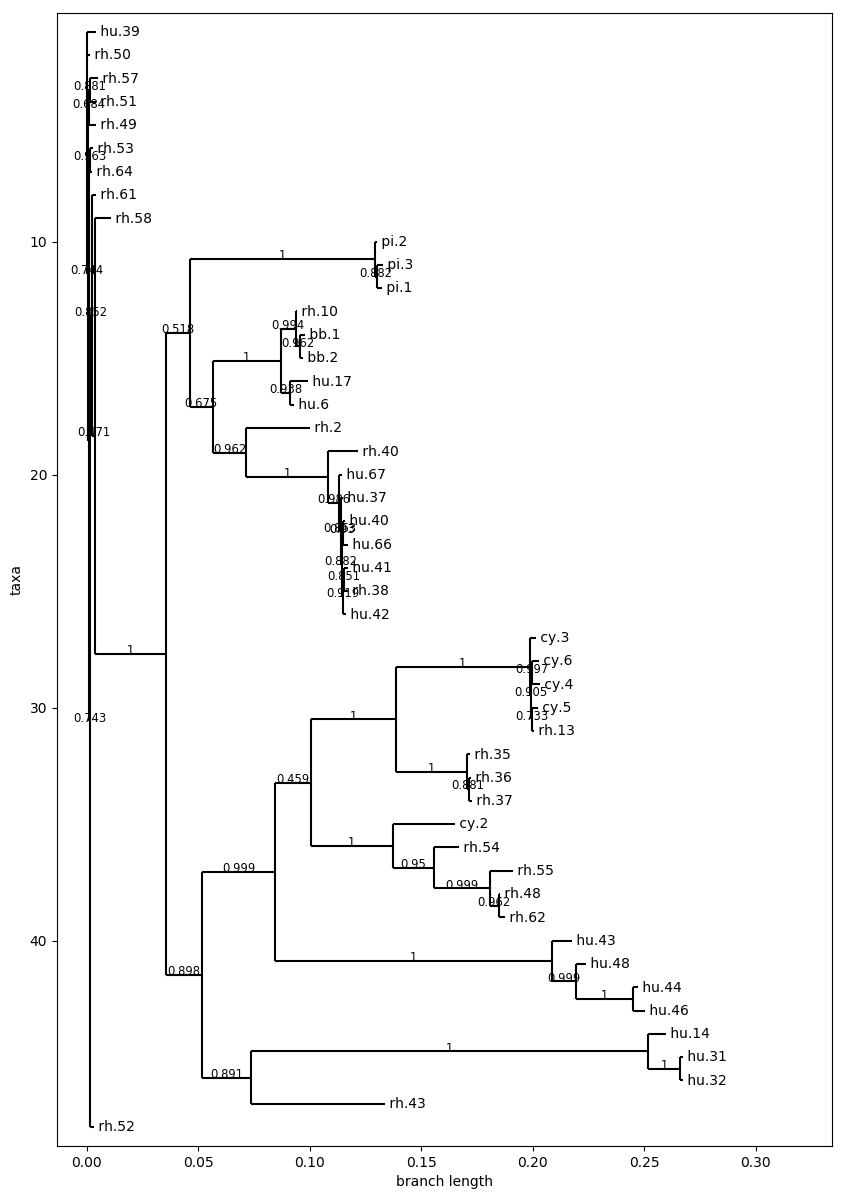

In [118]:
tree = Phylo.read('Desktop/tree.nwk', "newick")
fig = plt.figure(figsize=(10, 15), dpi=100)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(tree, axes=axes)

In [119]:
all_seqs = SeqIO.to_dict(SeqIO.parse("Desktop/seqs.aligned.fa", "fasta"))
my_seqs = ['rh.58', 'rh.40', 'rh.13']

seqs = []
for seq in my_seqs:
    print((all_seqs[seq]).id)
    print((all_seqs[seq]).seq)

rh.58
ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCTCTCTGAGGGCATTCGCGAGTGGTGGGACCTGAAACCTGGAGCCCCCAAGCCCAAGGCCAACCAGCAGAAGCAGGACGACGGCCGGGGTCTGGTGCTTCCTGGCTACAAGTACCTCGGACCCTTCAACGGACTCGACAAGGGGGAGCCCGTCAACGCGGCGGACGCAGCGGCCCTCGAGCACGACAAGGCCTACGACCAGCAGCTCAAAGCGGGTGACAATCCGTACCTGCGGTATAATCACGCCGACGCCGAGTTTCAGGAGCGTCTGCAAGAAGATACGTCTTTTGGGGGCAACCTCGGGCGAGCAGTCTTCCAGGCCAAGAAGCGGGTTCTCGAACCTCTCGGTCTGGTTGAGGAAGCTGCTAAGACGGCTCCTGGAAAGAAGAGACCGGTAGAACCGTCACCTCAGCGTTCCCCCGACTCCTCCACGGGCATCGGCAAGAAAGGCCAGCAGCCCGCTAGAAAGAGACTGAACTTTGGGCAGACTGGCGACTCAGAGTCAGTCCCCGACCCTCAACCAATCGGAGAACCTCCAGCAGCGCCCTCTAGTGTGGGATCTGGTACAATGGCCGCAGGCGGTGGCGCACCAATGGCAGACAATAACGAAGGTGCCGACGGAGTGGGTAGTTCCTCGGGAAATTGGCATTGCGATTCCACATGGCTGGGCGACAGAGTCATCACCACCAGCACCCGAACCTGGGCCCTGCCCACCTACAACAACCACCTCTACAAGCAAATCTCCAACGGGACCTCGGGAGGCAGCACCAACGACAACACCTACTTTGGCTACAGCACCCCCTGGGGGTATTTTGACTTTAACAGATTCCACTGCCACTTCTCACCACGTGACTGGCAGCGACTCATCAACAACAACTGGGGATTCCGGCCCAAGAGACTCAGCTTCAAGCTCTTCAACATCCAGGTCAAAGAGGTCACGCAGAATGAAGGCA

BLAST results:

Cluster 1:
rh.58:Adeno-associated virus isolate rh.58 capsid protein VP1 (cap) gene, complete cds

Cluster 2: rh.40: Adeno-associated virus isolate rh.40 capsid protein VP1 (cap) gene, complete cds

Cluster 3: rh.13: Non-human primate Adeno-associated virus isolate AAVrh.13 capsid protein (VP1) gene, complete cds

All of the genes I chose match an Adeno-associated virus isolate's capsid protein VP1 gene, and other genes in their cluster come up with high similarity in the BLAST search.


In [134]:
cluster1 = ['hu.39', 'rh.50', 'rh.57', 'rh.51', 'rh.49', 'rh.53', 'rh.64', 'rh.61', 'rh.58']
cluster2 = ['pi.2', 'pi.3', 'pi.1', 'rh.10', 'bb.1', 'bb.2', 'hu.17', 'hu.6', 'rh.2', 'rh.40', 'hu.67', 'hu.37', 'hu.40', 'hu.66', 'hu.41', 'rh.38', 'hu.42']
cluster3 = ['cy.3', 'cy.6', 'cy.4', 'cy.5', 'rh.13', 'rh.35', 'rh.36', 'rh.37', 'cy.2', 'rh.54', 'rh.55', 'rh.48', 'rh.62', 'hu.48', 'hu.44', 'hu.46', 'hu.14', 'hu.31', 'hu.31', 'rh.43']

clusters = [cluster1, cluster2, cluster3]
compiled_list = [[], [], []]
i = 0
# print(all_seqs['hu.39'].seq)


for cluster in clusters:
    
    gene_count = 0
    AT_list = [0] * 2238
    for gene in cluster:
        gene_count += 1
        index = 0
        curr_seq = all_seqs[gene]
        for position in curr_seq:
            if position == "A" or position == "T":
                AT_list[index] += 1
            index +=1
    new = [x/gene_count for x in AT_list]
    compiled_list[i] = new
    i+=1
    


                

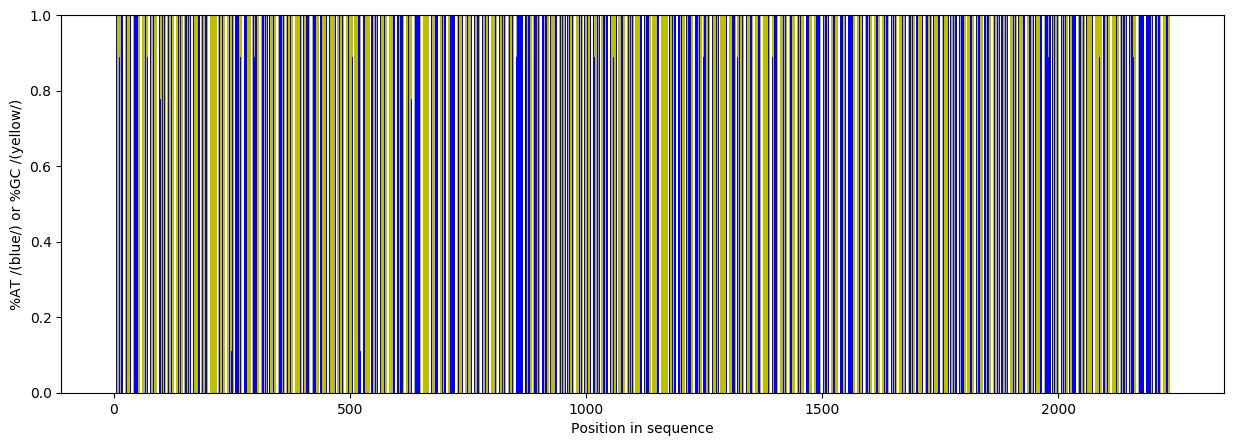

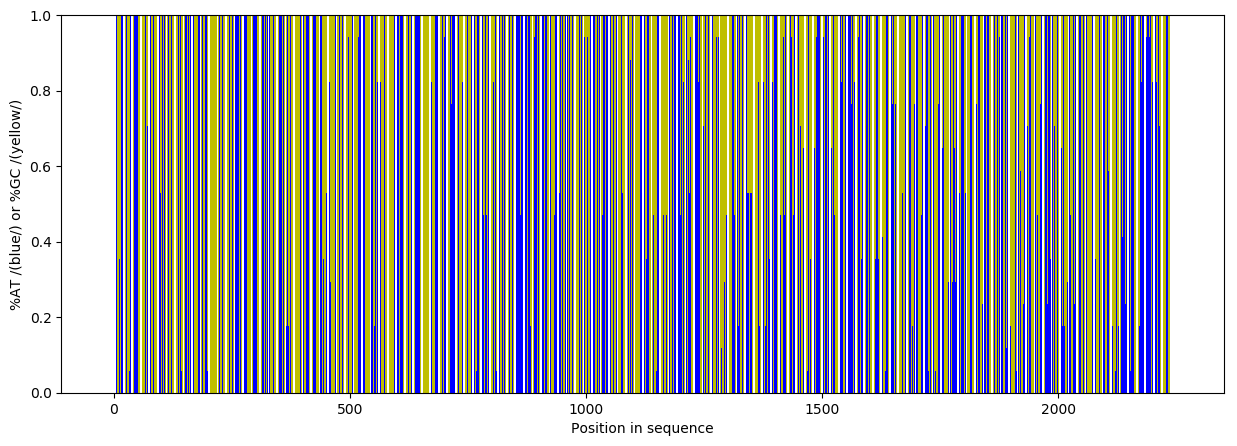

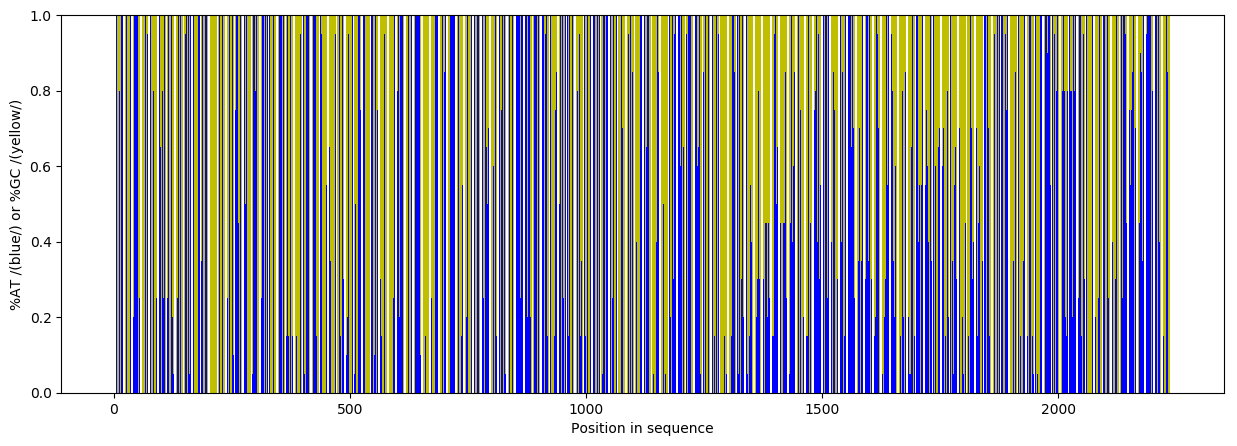

In [143]:
for cluster in compiled_list:
    AT = cluster
    CG = [1-x for x in AT]
    fig = plt.figure(figsize=(15, 5), dpi=100)
    plt.bar(range(1, 2239), AT, color='B')
    plt.bar(range(1, 2239), CG, bottom=AT, color='y')
    plt.xlabel('Position in sequence')
    plt.ylabel('%AT /(blue/) or %GC /(yellow/)')

End of the genes have more AT!

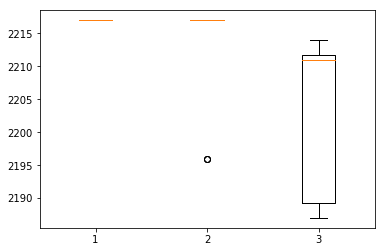

In [161]:
unaligned = all_seqs = SeqIO.to_dict(SeqIO.parse("Desktop/seqs.fa", "fasta"))

lengths = [[], [], []]
i = 0 

for cluster in clusters:
    for gene in cluster:
        lengths[i] += [len(all_seqs[gene])]
    i+=1

 
fig, plot = plt.subplots()
plot.boxplot(lengths)
plt.show()